# Analysis of Python Vacancies Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Task 1
Analyze the most frequently mentioned technologies in job listings

This script performs the following steps:
- Load the job listings data from a CSV file.
- Extract the 'requirements' column, which contains the list of technologies required for each job.
- Split the requirements into individual technologies and count the occurrences of each technology across all job listings.
- Identify the top 15 most frequently mentioned technologies.
- Create a bar chart to visualize the top 15 technologies and their respective counts.

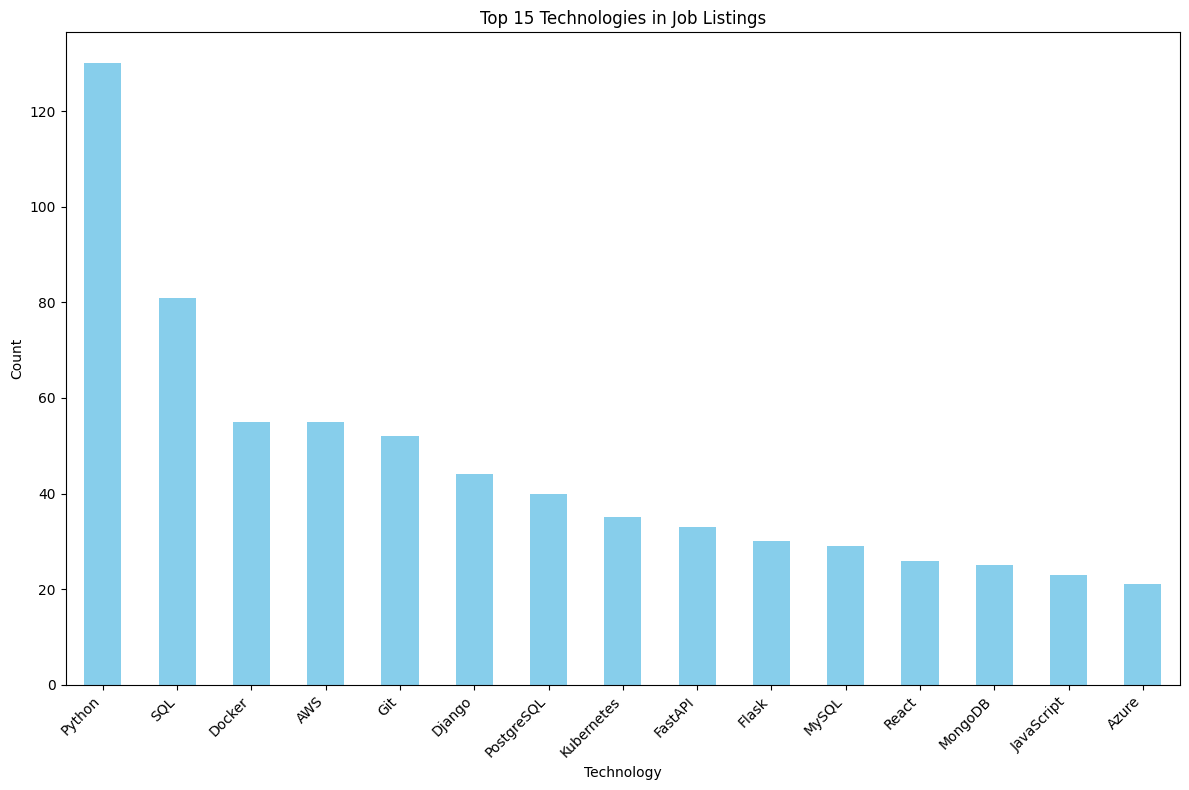

In [6]:
# Load the CSV file
file_path = '../data/vacancies.csv'
vacancies_df = pd.read_csv(file_path)

# Extract the 'requirements' column and split the technologies
requirements_series = vacancies_df['requirements'].dropna().str.split(',')

# Flatten the list of lists and count the occurrences of each technology
all_technologies = [tech.strip() for sublist in requirements_series for tech in sublist]
technology_counts = pd.Series(all_technologies).value_counts()

# Get the top 15 technologies
top_15_technologies = technology_counts.head(15)

# Plot the top 15 technologies
plt.figure(figsize=(12, 8))
top_15_technologies.plot(kind='bar', color='skyblue')
plt.title('Top 15 Technologies in Job Listings')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

## Task 2
Analyze the distribution of job listings by location

This script performs the following steps:
- Load the job listings data from a CSV file.
- Extract the 'city' column, which contains the location of each job.
- Count the occurrences of each location across all job listings.
- Create a bar chart to visualize the distribution of job listings by location.

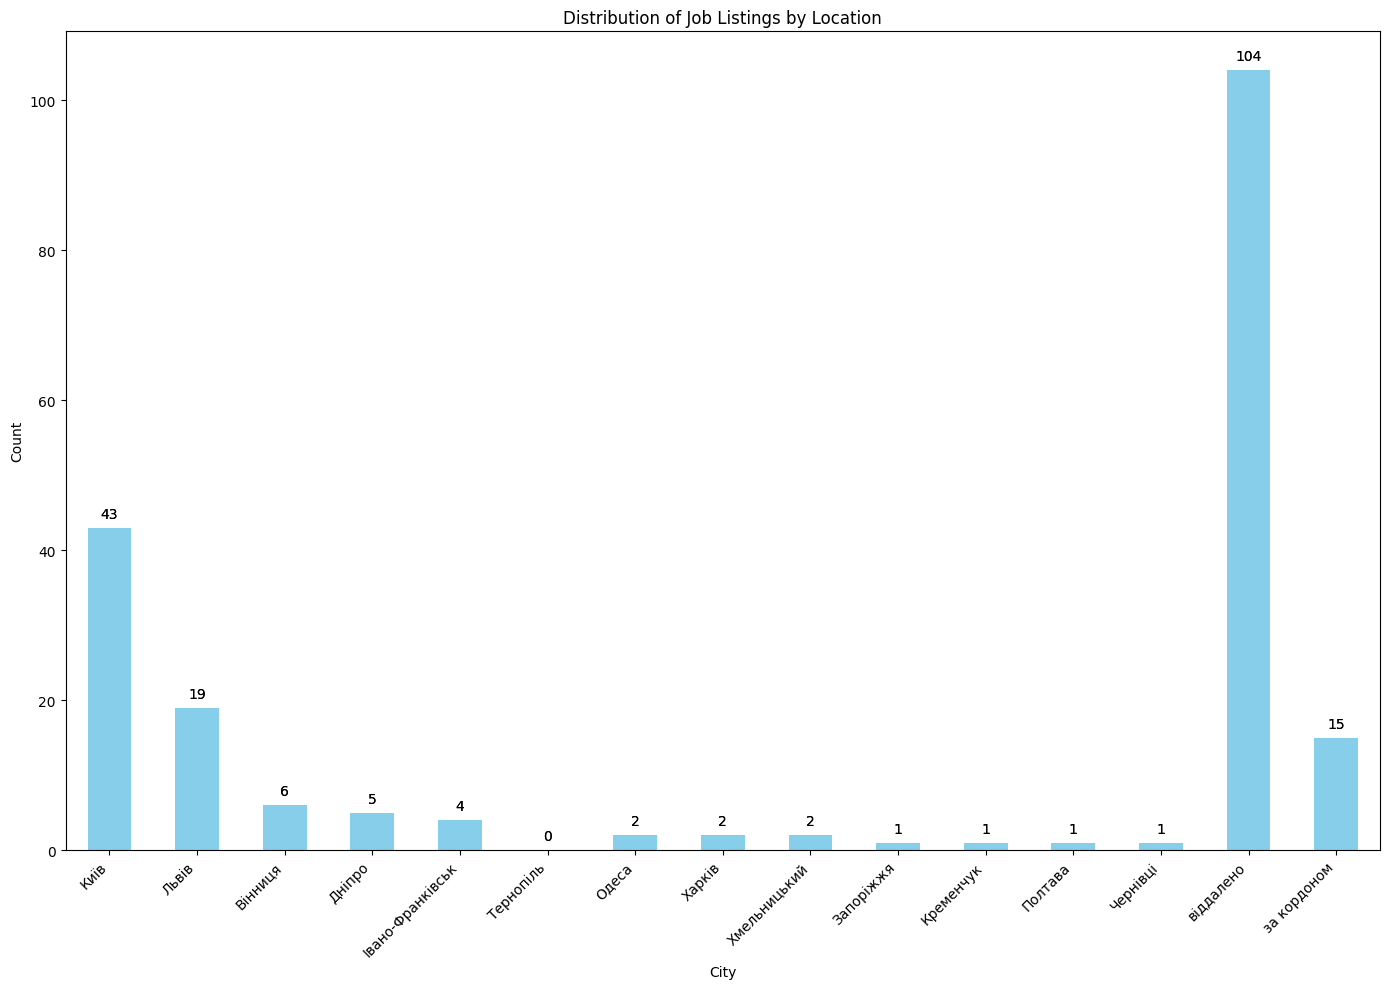

In [11]:
# Extract the 'city' column and split combined locations
cities_series = vacancies_df['city'].str.split(',').explode().str.strip()

# Count the occurrences of each city
city_counts = cities_series.value_counts()

# Filter and count specific locations
locations = {
    'Київ': 0, 'Львів': 0, 'Вінниця': 0, 'Дніпро': 0, 'Івано-Франківськ': 0,
    'Тернопіль': 0, 'Одеса': 0, 'Харків': 0, 'Хмельницький': 0, 'Запоріжжя': 0,
    'Кременчук': 0, 'Полтава': 0, 'Чернівці': 0, 'віддалено': 0, 'за кордоном': 0
}

for location in locations.keys():
    if location in city_counts:
        locations[location] = city_counts[location]

# Plot the distribution of job listings by location
plt.figure(figsize=(14, 10))
ax = pd.Series(locations).plot(kind='bar', color='skyblue')
pd.Series(locations).plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Listings by Location')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the numeric labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Display the plot
plt.show()

## Task 3
Analyze the distribution of job listings by experience level

This script performs the following steps:
- Load the job listings data from a CSV file.
- Extract the 'experience' column, which contains the level of experience required for each job.
- Count the occurrences of each experience level across all job listings.
- Create a bar chart to visualize the distribution of job listings by experience level.

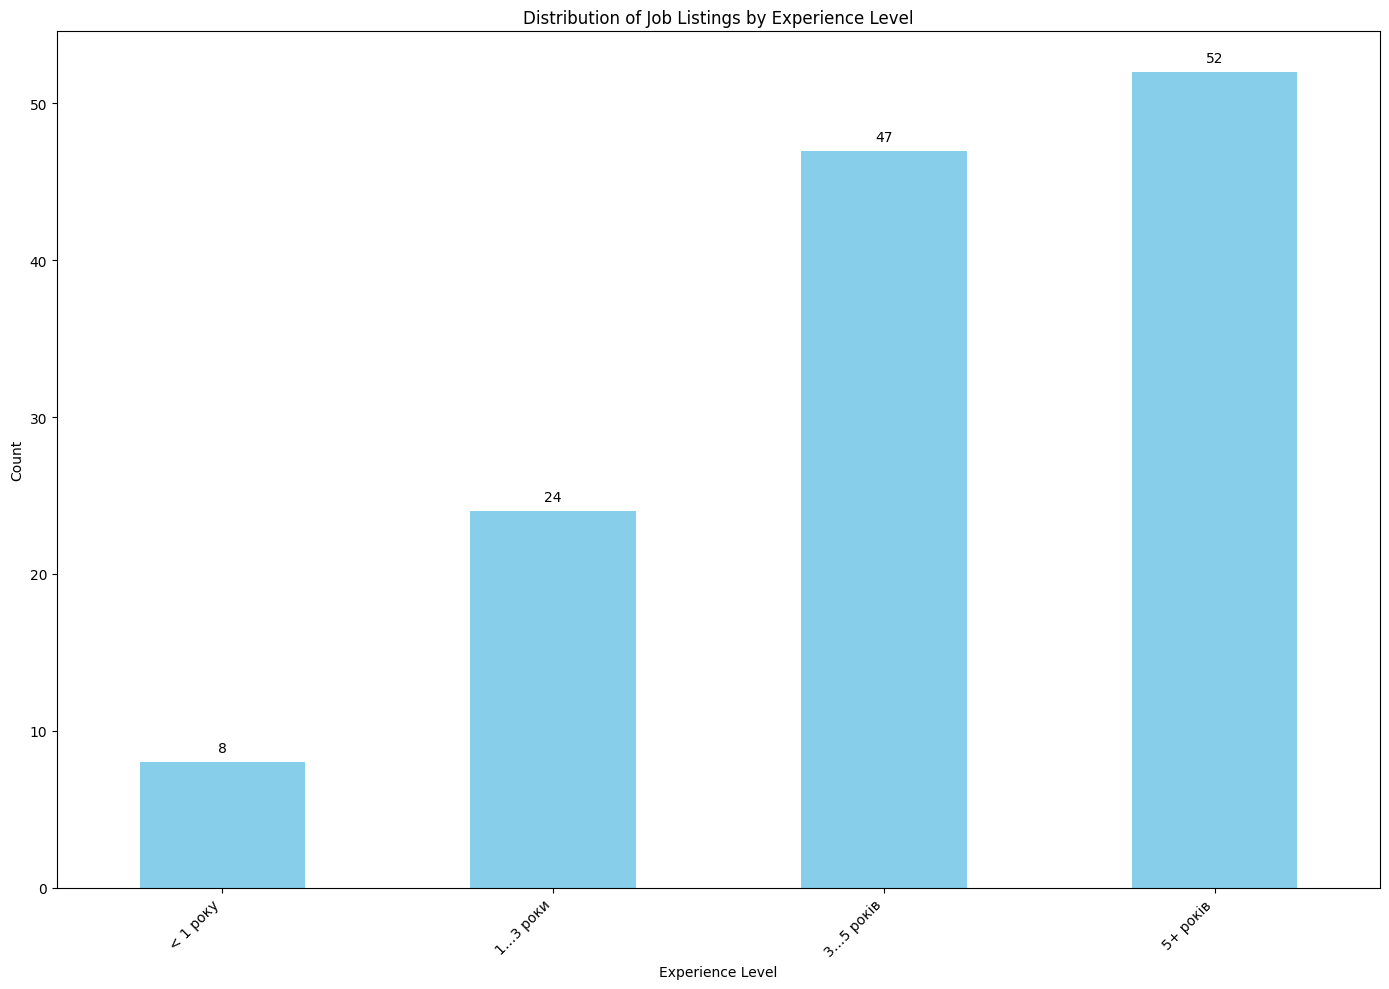

In [13]:
# Extract the 'experience' column and map to the desired format
experience_mapping = {
    '0-1': '< 1 року',
    '1-3': '1…3 роки',
    '3-5': '3…5 років',
    '5+': '5+ років'
}
vacancies_df['experience_mapped'] = vacancies_df['experience'].map(experience_mapping)

# Count the occurrences of each experience level in the mapped format
experience_counts = vacancies_df['experience_mapped'].value_counts().reindex(['< 1 року', '1…3 роки', '3…5 років', '5+ років'])

# Plot the distribution of job listings by experience level
plt.figure(figsize=(14, 10))
ax = experience_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Listings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the numeric labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()